<span style="color:cyan"> **IMPORT LIBRARIES** </span>

In [1]:
import os
import zipfile
import pandas as pd
import duckdb as db
import matplotlib.pyplot as plt
import seaborn as sns

print('Libraries imported!')

Libraries imported!


<span style="color:cyan">**EXTRACT DATA**</span>

The process of extracting this data includes two steps:

1. Unzip the bike rental dataset.
2. Read the CSV files from the zip file into a DataFrame.


In [2]:
class Dataset:

    def unzip_dataset(self, source, destination):
        """
        Unzips a dataset from a source zip file to a destination directory.
        Parameters:
        source (str): The file path to the source zip file.
        destination (str): The directory where the contents of the zip file will be extracted.
        Returns:
        None
        Raises:
        Exception: If there is an error during the unzipping process, an exception is caught and an error message is printed.
        """
        try:
            with zipfile.ZipFile(source, 'r') as zip :
                zip.extractall(destination)
                print(f'Dataset {source.split("/")[-1]} unzipped successfully!')
        
        except Exception as e:
            print('Error unzipping dataset: ', e)

    def read_csv(self, csv_source):
        """
        Reads a CSV file and returns a DataFrame.
        Parameters:
        csv_source (str): The file path to the CSV file.
        Returns:
        DataFrame: A pandas DataFrame containing the data from the CSV file.
        Raises:
        Exception: If there is an error reading the CSV file, an exception is caught and an error message is printed.
        """
        try:
            df = pd.read_csv(csv_source)
            print(f'Dataframe created from {csv_source.split("/")[-1]}')
        
        except Exception as e:
            print('Error reading csv file: ', e)

        return df

dataset = Dataset()
source = os.path.join(os.getcwd(), 'andre-personal/bike-rental-take-home-challenge/datasets.zip')
bike_rental = os.path.join(os.getcwd(), 'andre-personal/bike-rental-take-home-challenge')
dataset.unzip_dataset(source, bike_rental)

csv_files = os.listdir(os.path.join(bike_rental, 'datasets'))
for file in csv_files:
    if file.__contains__('companies'):
        df_companies = dataset.read_csv(os.path.join(bike_rental, 'datasets', file))
    elif file.__contains__('rental_history'):
        df_rental_history = dataset.read_csv(os.path.join(bike_rental, 'datasets', file))

Dataset datasets.zip unzipped successfully!
Dataframe created from companies.csv
Dataframe created from rental_history.csv


<span style="color:cyan"> **DATA CLEANING** </span>

* Convert the `datetime` column from string format to `datetime` format.
* Map `season` numbers to their corresponding season names for better readability.
* Clean the `working day` column by removing any quotes and casting the values as integers.


In [3]:
df_rental_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   workingday  10886 non-null  object 
 3   weather     10886 non-null  object 
 4   temp        10886 non-null  float64
 5   humidity    10886 non-null  int64  
 6   windspeed   10886 non-null  float64
 7   count       10886 non-null  int64  
 8   company_id  10886 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 765.5+ KB


In [4]:
class DataCleaning:

    def remove_duplicates(self, df):
        """
        Remove duplicate rows from a DataFrame.

        This function removes duplicate rows from the provided DataFrame in place
        and prints the number of duplicates removed.

        Parameters:
        df (pandas.DataFrame): The DataFrame from which to remove duplicate rows.

        Returns:
        pandas.DataFrame: The DataFrame with duplicates removed.
        """

        print('Start removing duplicates...')

        nr_records = df.shape[0]
        df.drop_duplicates(inplace=True)
        nr_duplicates = nr_records - df.shape[0]
        print(nr_duplicates, 'duplicates removed')

        return df

    def convert_and_clean(self, df): 
        """
        Cleans the given DataFrame by performing several operations:

        1. Converts the 'datetime' column to datetime objects.
        2. Cleans the 'season' column by removing single quotes and converting it to integers.
        3. Maps the 'season' column to a textual representation and stores it in a new column 'season_text'.
        4. Cleans the 'workingday' column by removing single quotes and converting it to integers.

        Args:
            df (pd.DataFrame): The DataFrame containing the rental history data.
            
        Returns:
            pd.DataFrame: The cleaned DataFrame.
        """

        print('Start cleaning df_rental_history dataframe...')

        df['datetime'] = pd.to_datetime(df['datetime'])

        df['season'] = df['season'].str.replace("'", "", regex=False).astype('int64')
        df['season_text'] = df['season'].astype('str').map({'1': 'Spring', '2': 'Summer', '3': 'Fall', '4': 'Winter'})

        df['workingday'] = df['workingday'].str.replace("'", "", regex=False).astype('int64')

        print('Data cleaning completed!')
        return df
    
    def get_datetime(self, df, df_column):
        """
        Extracts datetime components from a specified column in a DataFrame and adds them as new columns.

        Parameters:
        df (pandas.DataFrame): The DataFrame containing the datetime column.
        df_column (str): The name of the column in the DataFrame from which to extract datetime components.

        Returns:
        pandas.DataFrame: The DataFrame with new columns 'year', 'month', 'day', 'hour', and 'weekday' added.

        The function adds the following columns to the DataFrame:
        - 'year': The year component of the datetime.
        - 'month': The month component of the datetime.
        - 'day': The day component of the datetime.
        - 'hour': The hour component of the datetime.
        - 'weekday': The weekday component of the datetime (0 = Monday, 6 = Sunday).
        """

        df['year']    = df[df_column].dt.year
        df['month']   = df[df_column].dt.month
        df['day']     = df[df_column].dt.day
        df['hour']    = df[df_column].dt.hour
        df['weekday'] = df[df_column].dt.weekday

        print('Columns year, month, day, hour, and weekday created successfully!')
        return df 


data_cleaning = DataCleaning() 

df_rental_history = data_cleaning.remove_duplicates(df_rental_history)
df_rental_history = data_cleaning.convert_and_clean(df_rental_history)
df_rental_history = data_cleaning.get_datetime(df_rental_history, 'datetime')
df_rental_history

Start removing duplicates...
0 duplicates removed
Start cleaning df_rental_history dataframe...
Data cleaning completed!
Columns year, month, day, hour, and weekday created successfully!


,datetime,season,workingday,weather,temp,humidity,windspeed,count,company_id,season_text,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,Nice,9.84,81,0.000,16,436,Spring,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,Nice,9.02,80,0.000,40,356,Spring,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,Nice,9.02,80,0.000,32,431,Spring,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,Nice,9.84,75,0.000,13,431,Spring,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,Nice,9.84,75,0.000,1,130,Spring,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,1,Nice,15.58,50,260.027,336,356,Winter,2012,12,19,19,2
10882,2012-12-19 20:00:00,4,1,Nice,14.76,57,150.013,241,353,Winter,2012,12,19,20,2
10883,2012-12-19 21:00:00,4,1,Nice,13.94,61,150.013,168,60,Winter,2012,12,19,21,2
10884,2012-12-19 22:00:00,4,1,Nice,13.94,61,60.032,129,352,Winter,2012,12,19,22,2


<span style="color:cyan"> **QUESTION 1** </span>

How many times was Wednesday the day of week with the highest rental count?

In [5]:
class DataAnalysis:

    def sql(self, query):
        """
        Executes a SQL query on the database and returns the result as a DataFrame.
        Args:
            query (str): The SQL query to be executed.
        Returns:
            DataFrame: The result of the query as a pandas DataFrame.
        """
        
        result = db.query(query).df()
        print('Query executed successfully!')
        print(result)

data_analysis = DataAnalysis()

In [6]:
question1_query = """

with daily_rentals as (

     SELECT 
          CAST(datetime as DATE) as date,
          year,
          WEEKOFYEAR(datetime) as week_number,
          weekday as week_day,
          SUM(count) as daily_rentals

     FROM df_rental_history

     GROUP BY 
          date, 
          year,
          week_day, 
          week_number
)
,ranked_rentals as (

     SELECT *,
          RANK() OVER (PARTITION BY year, week_number ORDER BY daily_rentals DESC) AS rank

     FROM daily_rentals
) 

SELECT 
     date,
     year,
     week_number,
     week_day,
     daily_rentals

FROM ranked_rentals
WHERE 1=1
     AND rank = 1
     AND week_day = 3
ORDER BY 1
"""

data_analysis.sql(question1_query)
print('Wednesday was 9 times the day with the highest number of rentals in a week')

Query executed successfully!
        date  year  week_number  week_day  daily_rentals
0 2011-01-06  2011            1         3         1606.0
1 2011-04-07  2011           14         3         3141.0
2 2011-05-12  2011           19         3         4864.0
3 2011-05-19  2011           20         3         4575.0
4 2011-09-01  2011           35         3         5115.0
5 2012-01-12  2012            2         3         4097.0
6 2012-03-01  2012            9         3         4990.0
7 2012-03-08  2012           10         3         5382.0
8 2012-11-01  2012           44         3         5986.0
Wednesday was 9 times the day with the highest number of rentals in a week


<span style="color:cyan"> **QUESTION 2**  </span>

Compute the ranking of each company with regards to the total number of rentals. The output should include a table with the columns:
* `rank`: starting with 1 for the company with the highest number of rentals 
* `company_name`: the company_name as provided by the `companies.csv` data set
* `count_rentals`: total number of rentals

<span style="color:cyan"> Answer using pandas: </span>

In [7]:
# Merge the two dataframes using company_id as the key
df_companies = df_companies.rename(columns={'id': 'company_id'})
merged_df = df_rental_history.join(df_companies.set_index('company_id'),
                                    on='company_id',
                                      how='inner')
merged_df.head()

,datetime,season,workingday,weather,temp,humidity,windspeed,count,company_id,season_text,year,month,day,hour,weekday,name
0,2011-01-01 00:00:00,1,0,Nice,9.84,81,0.000,16,436,Spring,2011,1,1,0,5,JUMP Bikes
6,2011-01-01 06:00:00,1,0,Nice,9.02,80,0.000,2,436,Spring,2011,1,1,6,5,JUMP Bikes
11,2011-01-01 11:00:00,1,0,Nice,14.76,81,190.012,56,436,Spring,2011,1,1,11,5,JUMP Bikes
28,2011-01-02 04:00:00,1,0,Cloudy,18.86,94,12.998,3,436,Spring,2011,1,2,4,6,JUMP Bikes
47,2011-01-03 00:00:00,1,1,Nice,9.02,44,239.994,5,436,Spring,2011,1,3,0,0,JUMP Bikes


In [8]:
# Calculate the number of rentals for each company and create a rank column
company_rentals = merged_df.groupby('name')['count'].sum().reset_index()
company_rentals['rank'] = company_rentals['count'].rank(ascending=False).astype('int64')
company_rentals = company_rentals.sort_values(by='rank')
company_rentals

,name,count,rank
9,Ofo,391404,1
12,Rent Riders,294522,2
11,Pandarillo,235392,3
16,Zagster,164386,4
8,MoBycy,162639,5
0,Bikiberia,93273,6
3,Donkey Republic,82918,7
7,MoBike,82706,8
13,Spin,82340,9
15,Yulu,77859,10


In [9]:
# Rename and reorder columns
company_rentals.rename(columns={'name': 'company_name', 'count': 'count_rentals', 'rank': 'rank'}, inplace=True)
company_rentals_table = company_rentals[['rank', 'company_name', 'count_rentals']]
company_rentals_table

,rank,company_name,count_rentals
9,1,Ofo,391404
12,2,Rent Riders,294522
11,3,Pandarillo,235392
16,4,Zagster,164386
8,5,MoBycy,162639
0,6,Bikiberia,93273
3,7,Donkey Republic,82918
7,8,MoBike,82706
13,9,Spin,82340
15,10,Yulu,77859


<span style="color:cyan"> Answer using SQL: </span>

In [10]:
question2_query = """

SELECT 
    RANK() OVER (ORDER BY count_rentals DESC) as rank,
    company_name,
    CAST(count_rentals as int) as count_rentals

FROM (
    SELECT 
        name as company_name, 
        SUM(count) as count_rentals
    FROM df_rental_history rh
        INNER JOIN df_companies c on rh.company_id = c.company_id
    GROUP BY name
) as counts

ORDER BY 1
"""

data_analysis.sql(question2_query)

Query executed successfully!
    rank     company_name  count_rentals
0      1              Ofo         391404
1      2      Rent Riders         294522
2      3       Pandarillo         235392
3      4          Zagster         164386
4      5           MoBycy         162639
5      6        Bikiberia          93273
6      7  Donkey Republic          82918
7      8           MoBike          82706
8      9             Spin          82340
9     10             Yulu          77859
10    11             Lime          76559
11    12       JUMP Bikes          70833
12    13        Citi Bike          70434
13    14             HOPR          70406
14    15              Zyp          53350
15    16            Yooyo          45286
16    17             Bixi          19867
17    18              Ojo           8369


<span style="color:cyan"> **QUESTION 3** </span>

On which day did each hour get its highest number of rentals? The output should be a table sorted by hour with the following columns:

* `hour`: hour of the day from 0 to 23
* `date`: the date at which the `hour` had the highest number of rentals
* `count_rentals`: the highest number of rentals for the `hour`

In [11]:
question3_query = """

with rentals_rank as (

    SELECT 
        CAST(datetime as DATE) as date,
        hour, 
        count,
        RANK() OVER (PARTITION BY hour ORDER BY count DESC) as rank

    FROM df_rental_history
)

SELECT 
    hour,
    date,
    count as count_rentals

FROM rentals_rank
WHERE 1=1
    AND rank = 1

ORDER BY 3 DESC
"""

data_analysis.sql(question3_query)

Query executed successfully!
    hour       date  count_rentals
0     18 2012-09-12            977
1     17 2012-09-11            970
2      8 2012-10-10            839
3     16 2012-09-15            783
4     12 2012-09-09            757
5     19 2012-10-11            743
6     14 2012-05-19            730
7     13 2012-09-09            729
8     15 2012-11-11            724
9     11 2012-10-06            647
10     7 2012-09-11            596
11    21 2012-07-04            584
12    20 2012-07-04            551
13    10 2012-10-06            539
14    22 2012-07-04            502
15     9 2012-07-13            414
16     0 2012-11-07            283
17    23 2012-05-04            256
18     6 2012-07-17            213
19     1 2012-07-15            168
20     2 2012-08-19            119
21     3 2012-03-11             66
22     5 2012-09-13             57
23     4 2012-09-09             28


<span style="color:cyan"> **QUESTION 4** </span>

Compare daily count of rentals between 2011 and 2012. Use whichever approach(es) and/or visualization(s) that you think best showcases the comparison.

Datetime column converted to date successfully!
Daily rentals calculated successfully!
Filtering DataFrame for year 2011
Filtering DataFrame for year 2012
Creating line plot...
Line plot created successfully!


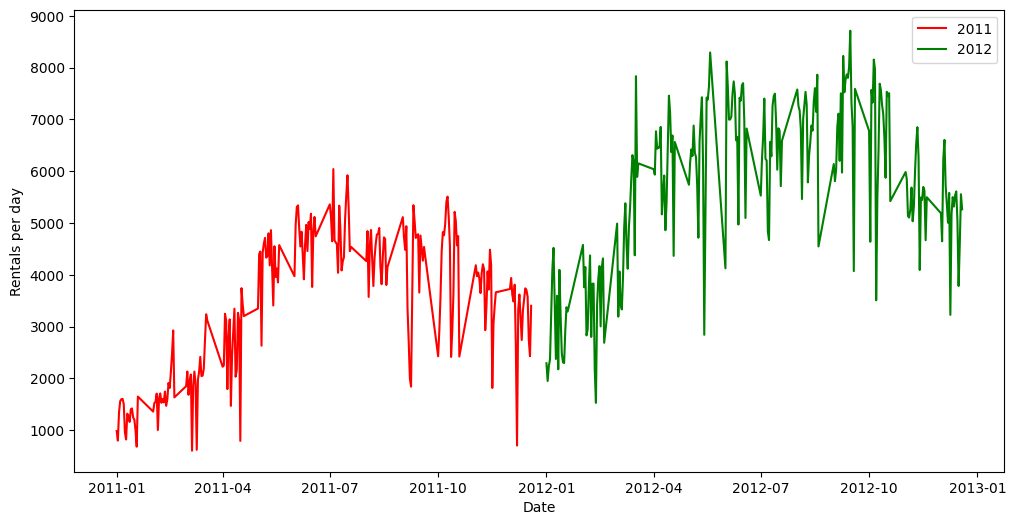

In [12]:
df_rental_history['date'] = pd.to_datetime(df_rental_history['datetime']).dt.date
print('Datetime column converted to date successfully!')

df_daily_rents = df_rental_history.groupby(['date','year'])['count'].sum().reset_index()
df_daily_rents = df_daily_rents.rename(columns={'count': 'Rentals per day', 'date': 'Date'})
print('Daily rentals calculated successfully!')

def filter_year(df, year):
    """
    Filters the DataFrame to include only rows where the 'year' column matches the specified year.

    Parameters:
    df (pandas.DataFrame): The DataFrame to filter.
    year (int): The year to filter the DataFrame by.

    Returns:
    pandas.DataFrame: A DataFrame containing only the rows where the 'year' column matches the specified year.
    """

    print(f'Filtering DataFrame for year {year}')
    return df[df['year'] == year]

df_daily_rents_2021 = filter_year(df_daily_rents, 2011)
df_daily_rents_2022 = filter_year(df_daily_rents, 2012)

print('Creating line plot...')
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Rentals per day', data=df_daily_rents_2021, label='2011', color='red')
sns.lineplot(x='Date', y='Rentals per day', data=df_daily_rents_2022, label='2012', color='green')
print('Line plot created successfully!')

plt.show()

<span style="color:cyan"> **QUESTION 5** </span>

Illustrate the effect of `weather`, `temp` , `humidity` and `windspeed` on the number of rented bikes. Use whichever approach(es) and/or visualization(s) that you think best illustrates the answer.

In [13]:
df_rental_history['weather'].value_counts()

Nice          7192
Cloudy        2834
Light rain     859
Heavy rain       1
Name: weather, dtype: int64

In [14]:
# Map weather to numerical values
df_rental_history['weather_mapping'] = df_rental_history['weather'].map({'Nice': 1, 'Cloudy': 2, 'Light rain': 3, 'Heavy rain': 4})
df_rental_history['weather_mapping'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather_mapping, dtype: int64

In [15]:
# Calculate the correlation matrix
corr = df_rental_history[['count', 'weather_mapping', 'temp', 'humidity', 'windspeed']].corr()
print(round(corr,2))

                 count  weather_mapping  temp  humidity  windspeed
count             1.00            -0.13  0.39     -0.32       0.09
weather_mapping  -0.13             1.00 -0.06      0.41       0.00
temp              0.39            -0.06  1.00     -0.06      -0.03
humidity         -0.32             0.41 -0.06      1.00      -0.30
windspeed         0.09             0.00 -0.03     -0.30       1.00


<span style="color:cyan"> Evaluate the correlation: </span>

* **Weather and windspeed have a minimal influence** on bike rentals because their correlation coefficients are close to 0.
* **Temperature has a weak/moderate positive correlation** with bike rentals, which means that warmer eather will likely resut in more bike rentals.
* On the other hand, **humidity has a weak negative correlation** with bike rentals, which means that high humidity will be associated with less bike rentals.

<AxesSubplot:>

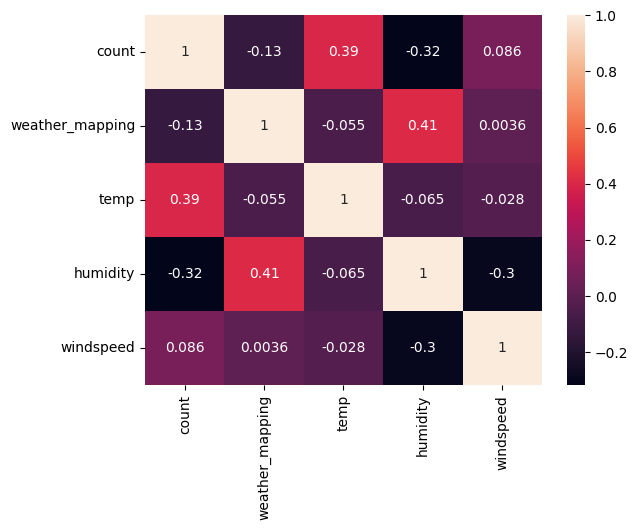

In [16]:
# Plot the correlation matrix
sns.heatmap(corr,
            annot=True)